<a href="https://colab.research.google.com/github/maisonjiang3-wq/GEOL0069_Assignments/blob/main/Chapter1_Unsupervised_Learning_Methods_Michel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

This section marks our journey into another significant domain of machine learning and AI: unsupervised learning. Rather than delving deep into theoretical intricacies, our focus here will be on offering a practical guide. We aim to equip you with a clear understanding and effective tools for employing unsupervised learning methods in real-world (EO) scenarios.

It's important to note that, while unsupervised learning encompasses a broad range of applications, our discussion will predominantly revolve around classification tasks. This is because unsupervised learning techniques are exceptionally adept at identifying patterns and categorising data when the classifications are not explicitly labeled. By exploring these techniques, you'll gain insights into how to discern structure and relationships within your datasets, even in the absence of predefined categories or labels.

The tasks in this notebook will be mainly two:
1. Discrimination of Sea ice and lead based on image classification based on Sentinel-2 optical data.
2. Discrimination of Sea ice and lead based on altimetry data classification based on Sentinel-3 altimetry data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction to Unsupervised Learning Methods {cite}`bishop2006pattern`

### Introduction to K-means Clustering

K-means clustering is a type of unsupervised learning algorithm used for partitioning a dataset into a set of k groups (or clusters), where k represents the number of groups pre-specified by the analyst. It classifies the data points based on the similarity of the features of the data {cite}`macqueen1967some`. The basic idea is to define k centroids, one for each cluster, and then assign each data point to the nearest centroid, while keeping the centroids as small as possible.

### Why K-means for Clustering?

K-means clustering is particularly well-suited for applications where:

- **The structure of the data is not known beforehand**: K-means doesn’t require any prior knowledge about the data distribution or structure, making it ideal for exploratory data analysis.
- **Simplicity and scalability**: The algorithm is straightforward to implement and can scale to large datasets relatively easily.

### Key Components of K-means

1. **Choosing K**: The number of clusters (k) is a parameter that needs to be specified before applying the algorithm.
2. **Centroids Initialization**: The initial placement of the centroids can affect the final results.
3. **Assignment Step**: Each data point is assigned to its nearest centroid, based on the squared Euclidean distance.
4. **Update Step**: The centroids are recomputed as the center of all the data points assigned to the respective cluster.

### The Iterative Process of K-means

The assignment and update steps are repeated iteratively until the centroids no longer move significantly, meaning the within-cluster variation is minimised. This iterative process ensures that the algorithm converges to a result, which might be a local optimum.

### Advantages of K-means

- **Efficiency**: K-means is computationally efficient.
- **Ease of interpretation**: The results of k-means clustering are easy to understand and interpret.

### Basic Code Implementation

Below, you'll find a basic implementation of the K-means clustering algorithm. This serves as a foundational understanding and a starting point for applying the algorithm to your specific data analysis tasks.


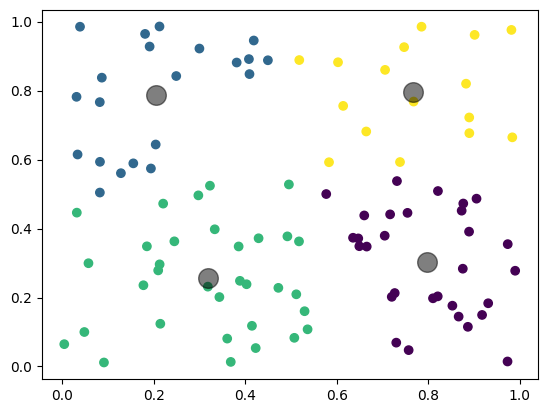

In [2]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


## Gaussian Mixture Models (GMM) {cite}`bishop2006pattern`

### Introduction to Gaussian Mixture Models

Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. The model assumes that the data is generated from a mixture of several Gaussian distributions, each with its own mean and variance {cite}`reynolds2009gaussian, mclachlan2004finite`. GMMs are widely used for clustering and density estimation, as they provide a method for representing complex distributions through the combination of simpler ones.

### Why Gaussian Mixture Models for Clustering?

Gaussian Mixture Models are particularly powerful in scenarios where:

- **Soft clustering is needed**: Unlike K-means, GMM provides the probability of each data point belonging to each cluster, offering a soft classification and understanding of the uncertainties in our data.
- **Flexibility in cluster covariance**: GMM allows for clusters to have different sizes and different shapes, making it more flexible to capture the true variance in the data.

### Key Components of GMM

1. **Number of Components (Gaussians)**: Similar to K in K-means, the number of Gaussians (components) is a parameter that needs to be set.
2. **Expectation-Maximization (EM) Algorithm**: GMMs use the EM algorithm for fitting, iteratively improving the likelihood of the data given the model.
3. **Covariance Type**: The shape, size, and orientation of the clusters are determined by the covariance type of the Gaussians (e.g., spherical, diagonal, tied, or full covariance).

### The EM Algorithm in GMM

The Expectation-Maximization (EM) algorithm is a two-step process:

- **Expectation Step (E-step)**: Calculate the probability that each data point belongs to each cluster.
- **Maximization Step (M-step)**: Update the parameters of the Gaussians (mean, covariance, and mixing coefficient) to maximize the likelihood of the data given these assignments.

This process is repeated until convergence, meaning the parameters do not significantly change from one iteration to the next.

### Advantages of GMM

- **Soft Clustering**: Provides a probabilistic framework for soft clustering, giving more information about the uncertainties in the data assignments.
- **Cluster Shape Flexibility**: Can adapt to ellipsoidal cluster shapes, thanks to the flexible covariance structure.

### Basic Code Implementation

Below, you'll find a basic implementation of the Gaussian Mixture Model. This should serve as an initial guide for understanding the model and applying it to your data analysis projects.


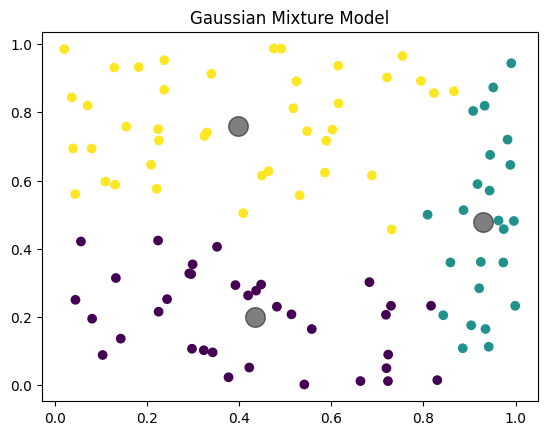

In [3]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()


## Image Classification
Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.

### K-Means Implementation

In [4]:
!  ls '/content/drive/MyDrive/GEOL0069/2526/Week 4/'

S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE
S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3
Unit_1_Data_Colocating_S2_S3.ipynb
Unit_2_Unsupervised_Learning_Methods.ipynb
Unit_2_Unsupervised_Learning_Methods_updated.ipynb


In [5]:
! pip install rasterio

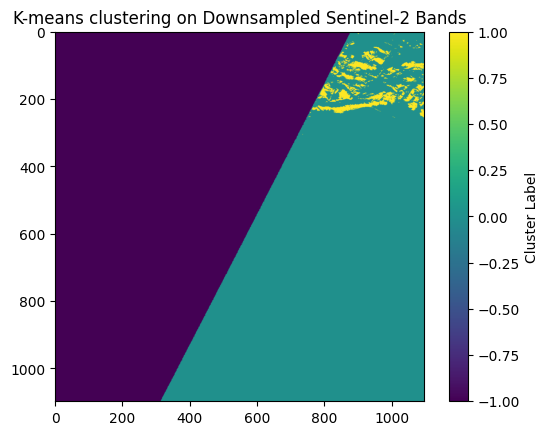

In [6]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the exact base path in your Google Drive
base_path = "/content/drive/MyDrive/GEOL0069/2526/Week 4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/"
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2', #
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2', #
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'  #
}

# Read and downsample the band images to prevent RAM crashes
band_data = []
scale_factor = 0.1 # Downsample to 10% of the original resolution

for band in ['B4', 'B3', 'B2']: #
    with rasterio.open(bands_paths[band]) as src:
        # Read the data and resize it simultaneously to save memory
        data = src.read(
            1,
            out_shape=(
                int(src.height * scale_factor),
                int(src.width * scale_factor)
            ),
            resampling=Resampling.bilinear
        )
        band_data.append(data)

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data) #
valid_data_mask = np.all(band_stack > 0, axis=2) #

# Reshape for K-means, only including valid data (using 3 features: B4, B3, B2)
X = band_stack[valid_data_mask].reshape((-1, 3)) #

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X) #
labels = kmeans.labels_ #

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int) #

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels #

# Plotting the result
plt.imshow(labels_image, cmap='viridis') #
plt.title('K-means clustering on Downsampled Sentinel-2 Bands')
plt.colorbar(label='Cluster Label') #
plt.show() #

### GMM Implementation

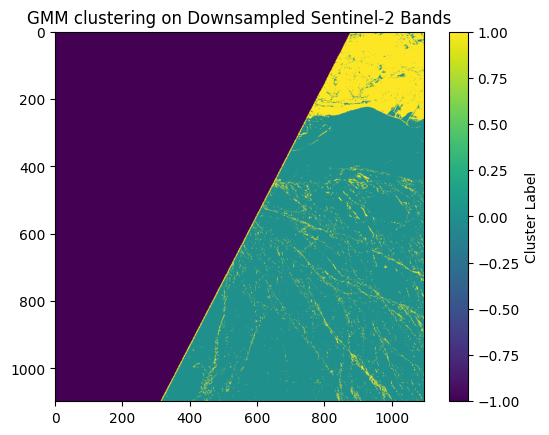

In [7]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. Define the exact base path in your Google Drive
base_path = "/content/drive/MyDrive/GEOL0069/2526/Week 4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/"
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2', #
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2', #
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'  #
}

# 2. Read and downsample the band images to prevent RAM crashes
band_data = []
scale_factor = 0.1 # Downsample to 10% of the original resolution to save memory

for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        # Read the data and resize it simultaneously
        data = src.read(
            1,
            out_shape=(
                int(src.height * scale_factor),
                int(src.width * scale_factor)
            ),
            resampling=Resampling.bilinear
        )
        band_data.append(data)

# 3. Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data) #
valid_data_mask = np.all(band_stack > 0, axis=2) #

# 4. Reshape for GMM, only including valid data (using 3 features: B4, B3, B2)
X = band_stack[valid_data_mask].reshape((-1, 3)) #

# 5. GMM clustering (2 components)
gmm = GaussianMixture(n_components=2, random_state=0).fit(X) #
labels = gmm.predict(X) #

# 6. Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int) #

# 7. Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels #

# 8. Plotting the result
plt.imshow(labels_image, cmap='viridis') #
plt.title('GMM clustering on Downsampled Sentinel-2 Bands')
plt.colorbar(label='Cluster Label') #
plt.show() #

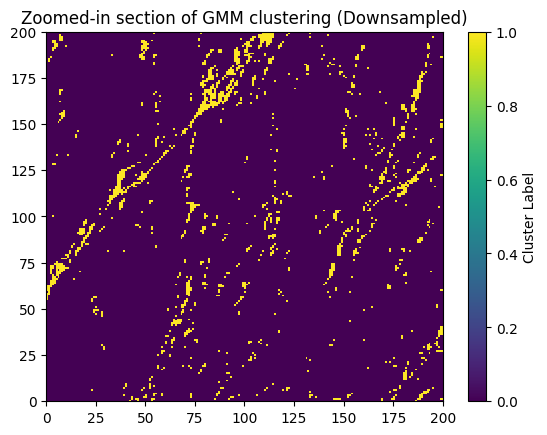

In [10]:
import matplotlib.pyplot as plt

# 1. Plot a specific region adjusted for the 10% downsampling
# Original was 8000:10000, now divided by 10 it becomes 800:1000
plt.pcolor(labels_image[800:1000, 800:1000])

plt.title('Zoomed-in section of GMM clustering (Downsampled)')
plt.colorbar(label='Cluster Label')
plt.show()

## Altimetry Classification
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

### Read in Functions Needed
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [11]:
! pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00


In [14]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree

import pyproj
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

# =========================================================================================================
# ===================================  SUBFUNCTIONS  ======================================================
# =========================================================================================================

def peakiness(waves, **kwargs):
    """
    Calculates the peakiness of altimetry waveforms.
    Peakiness is a key feature used to distinguish between sea ice and leads.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    print("Running peakiness function...")

    size = np.shape(waves)[0]
    waves1 = np.copy(waves)

    # Handle the case where only a single waveform is provided
    if waves1.ndim == 1:
        print('Only one waveform in file')
        waves2 = waves1.reshape(1, np.size(waves1))
        waves1 = waves2

    def by_row(waves, *args):
        """Calculates peakiness for each individual waveform row"""
        maximum = np.nanmax(waves)
        if maximum > 0:
            maximum_bin = np.where(waves == maximum)
            maximum_bin = maximum_bin[0][0]

            # Extract a 128-bin window around the maximum peak
            waves_128 = waves[maximum_bin-50 : maximum_bin+78]
            waves = waves_128

            # Calculate the noise floor using bins 10 to 20
            noise_floor = np.nanmean(waves[10:20])
            where_above_nf = np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum = np.nanmax(waves[where_above_nf])
                total = np.sum(waves[where_above_nf])
                mean = np.nanmean(waves[where_above_nf])
                peaky = maximum / mean
            else:
                peaky, maximum, total = np.nan, np.nan, np.nan
        else:
            peaky, maximum, total = np.nan, np.nan, np.nan

        # Return the requested specific variable
        if 'maxs' in args: return maximum
        if 'totals' in args: return total
        if 'peaky' in args: return peaky

    # Apply the peakiness calculation across all waveforms
    peaky = np.apply_along_axis(by_row, 1, waves1, 'peaky')

    # Plot waveforms if 'wf_plots' argument is provided
    if 'wf_plots' in kwargs:
        maximums = np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals = np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0, kwargs['wf_plots']):
            if i == 0:
                print("Plotting first " + str(kwargs['wf_plots']) + " waveforms")

            plt.plot(waves1[i, :])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5, maximums[i], "maximum=" + str(maximums[i]))
            plt.text(5, maximums[i]-2500, "total=" + str(totals[i]))
            plt.text(5, maximums[i]-5000, "peakiness=" + str(peaky[i]))
            plt.title('Waveform ' + str(i) + ' of ' + str(size) + '\nNoise floor average taken between red lines.')
            plt.show()

    return peaky

# =========================================================================================================

def unpack_gpod(variable):
    """
    Unpacks and interpolates variables from the Sentinel-3 NetCDF file.
    Expands 1Hz and C-band data to match the 20Hz Ku-band resolution.
    """
    from scipy.interpolate import interp1d

    time_1hz = SAR_data.variables['time_01'][:]
    time_20hz = SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out = (SAR_data.variables[variable][:]).astype(float)

    # Replace masked values with NaNs
    out = np.ma.filled(out, np.nan)

    # Interpolate 1Hz data to 20Hz
    if len(out) == len(time_1hz):
        print(variable, 'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz, out, fill_value="extrapolate")(time_20hz)

    # Interpolate C-band data to Ku-band resolution
    if len(out) == len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC, out, fill_value="extrapolate")(time_20hz)

    return out

# =========================================================================================================

def calculate_SSD(RIP):
    """
    Calculates the Stack Standard Deviation (SSD) by fitting a Gaussian curve
    to the Range Integrated Power (RIP).
    """
    from scipy.optimize import curve_fit
    # [CRITICAL FIX]: Imported 'asarray' and 'exp' from numpy instead of scipy to avoid deprecation errors
    from numpy import asarray as ar, exp

    do_plot = 'Off'

    def gaussian(x, a, x0, sigma):
        """Gaussian function used for curve fitting"""
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD = np.zeros(np.shape(RIP)[0]) * np.nan
    x = np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):
        y = np.copy(RIP[i])
        y[(np.isnan(y) == True)] = 0

        if 'popt' in locals():
            del(popt, pcov)

        # Estimate parameters for the Gaussian fit
        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))

        try:
            # Fit the Gaussian curve to extract standard deviation (sigma)
            popt, pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est], maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: " + str(e))
        except TypeError as t:
            print("Gaussian SSD curve-fit error: " + str(t))

        if do_plot == 'ON':
            plt.plot(x, y)
            plt.plot(x, gaussian(x, *popt), 'ro:', label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

        if 'popt' in locals():
            SSD[i] = abs(popt[2])

    return SSD

In [17]:
import os
from netCDF4 import Dataset

# 1. Base path
path = '/content/drive/MyDrive/GEOL0069/2526/Week 4/'

# 2. Automatically find any folder starting with 'S3A_SR_2_LAN'
folders = [f for f in os.listdir(path) if f.startswith('S3A_SR_2_LAN')]

if len(folders) > 0:
    # Use the first matching folder found
    actual_folder = folders[0]
    full_path = os.path.join(path, actual_folder, 'enhanced_measurement.nc')

    print(f"Success! Found folder: {actual_folder}")
    print(f"Full file path: {full_path}")

    # 3. Load the data
    try:
        SAR_data = Dataset(full_path)
        print("SAR_data loaded successfully!")
        print("Variables available:", list(SAR_data.variables.keys())[:10], "... (and more)")
    except Exception as e:
        print(f"Error loading NetCDF: {e}")
else:
    print("Error: No folder starting with 'S3A_SR_2_LAN' was found in the specified path.")
    print("Please check if the folder is uploaded to your Google Drive.")

Success! Found folder: S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3
Full file path: /content/drive/MyDrive/GEOL0069/2526/Week 4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc
SAR_data loaded successfully!
Variables available: ['time_01', 'time_20_ku', 'time_20_c', 'echo_sample_ind', 'wf_sample_ind', 'max_multi_stack_ind', 'UTC_day_01', 'UTC_sec_01', 'UTC_day_20_ku', 'UTC_sec_20_ku'] ... (and more)


In [19]:
# Print all available variables to find the correct name for Sigma0
print(SAR_data.variables.keys())

dict_keys(['time_01', 'time_20_ku', 'time_20_c', 'echo_sample_ind', 'wf_sample_ind', 'max_multi_stack_ind', 'UTC_day_01', 'UTC_sec_01', 'UTC_day_20_ku', 'UTC_sec_20_ku', 'UTC_day_20_c', 'UTC_sec_20_c', 'UTC_time_1hz_20_ku', 'UTC_time_1hz_20_c', 'lat_01', 'lon_01', 'lat_20_ku', 'lon_20_ku', 'lat_20_c', 'lon_20_c', 'surf_type_20_ku', 'surf_type_20_c', 'surf_class_01', 'surf_class_20_ku', 'surf_class_20_c', 'rad_surf_type_01', 'angle_coast_20_ku', 'dist_coast_20_ku', 'alt_20_ku', 'alt_20_c', 'orb_alt_rate_20_ku', 'orb_alt_rate_20_c', 'tracker_range_20_ku', 'tracker_range_20_c', 'tracker_range_20_plrm_ku', 'h0_nav_dem_20_ku', 'agc_20_ku', 'agc_20_c', 'agc_20_plrm_ku', 'agc_qual_20_ku', 'agc_qual_20_c', 'agc_qual_20_plrm_ku', 'scale_factor_20_ku', 'scale_factor_20_c', 'scale_factor_20_plrm_ku', 'range_water_20_ku', 'range_water_20_c', 'range_water_20_plrm_ku', 'range_water_qual_20_ku', 'range_water_qual_20_c', 'range_water_qual_20_plrm_ku', 'range_water_rms_01_ku', 'range_water_rms_01_c', '

In [20]:
# --------------------------------------------------------------------------------
# REFINED DATA EXTRACTION AND FEATURE CLEANING
# Based on the identified variable keys, we extract Sigma0, Waveforms, and Flags.
# --------------------------------------------------------------------------------

# 1. Extract raw variables using the correct keys identified from your file
# waveforms: the shape of the radar return echo
# sig0: the backscatter coefficient indicating surface roughness/type
# surf_flag: the official ESA classification (Lead vs Sea Ice)
lat_20_ku = unpack_gpod('lat_20_ku')
lon_20_ku = unpack_gpod('lon_20_ku')
waves_20_ku = unpack_gpod('waveform_20_ku')
sig0_20_ku = unpack_gpod('sig0_water_20_ku')
flag_cleaned = unpack_gpod('surf_type_class_20_ku')

print("Variables unpacked successfully. Calculating Peakiness...")

# 2. Calculate Peakiness (PP)
# This measures how 'sharp' the waveform is. Specular leads have high PP.
PP = peakiness(waves_20_ku)

# 3. (Optional but recommended) Calculate Stack Standard Deviation (SSD)
# SSD is derived from the Range Integrated Power (RIP) to help classification.
RIP = unpack_gpod('rip_20_ku')
SSD = calculate_SSD(RIP)

# 4. Filter and Clean Data
# We remove NaNs and focus only on points officially flagged as Sea Ice (1) or Leads (2).
# This prepares a 'Ground Truth' for the confusion matrix later.
is_finite = np.isfinite(PP) & np.isfinite(sig0_20_ku) & np.isfinite(SSD)
PP_cleaned = PP[is_finite]
sig0_cleaned = sig0_20_ku[is_finite]
SSD_cleaned = SSD[is_finite]
flag_cleaned = flag_cleaned[is_finite]
waves_cleaned = waves_20_ku[is_finite]

# Only keep Sea Ice (1) and Leads (2) for evaluation
mask = (flag_cleaned == 1) | (flag_cleaned == 2)
PP_final = PP_cleaned[mask]
sig0_final = sig0_cleaned[mask]
SSD_final = SSD_cleaned[mask]
flag_final = flag_cleaned[mask]
waves_final = waves_cleaned[mask]

print(f"Final dataset ready: {len(PP_final)} points.")

Variables unpacked successfully. Calculating Peakiness...
Running peakiness function...


/tmp/ipython-input-1188522718.py:52: RuntimeWarning: Mean of empty slice
  noise_floor = np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Final dataset ready: 12195 points.


In [ ]:
SAR_data.variables

In [23]:
import os
from netCDF4 import Dataset

# 1. Base path
path = '/content/drive/MyDrive/GEOL0069/2526/Week 4/'

# 2. Automatically find the actual .SEN3 folder in your directory
# This avoids FileNotFoundError caused by typing the wrong S3A/S3B prefix or timestamp
all_folders = [f for f in os.listdir(path) if f.endswith('.SEN3')]

if len(all_folders) > 0:
    # We take the first .SEN3 folder found
    SAR_file = all_folders[0]
    full_path = os.path.join(path, SAR_file, 'enhanced_measurement.nc')

    print(f"Success! Found actual folder: {SAR_file}")

    # 3. Load the NetCDF dataset
    SAR_data = Dataset(full_path)
    print("Dataset loaded successfully.")

    # --------------------------------------------------------------------------------
    # DATA PREPARATION (Continuing from your logic)
    # --------------------------------------------------------------------------------

    # Unpack variables (Note: using keys we confirmed earlier)
    SAR_lat = unpack_gpod('lat_20_ku')
    SAR_lon = unpack_gpod('lon_20_ku')
    waves = unpack_gpod('waveform_20_ku')
    sig_0 = unpack_gpod('sig0_water_20_ku')
    RIP = unpack_gpod('rip_20_ku')
    flag = unpack_gpod('surf_type_class_20_ku')

    # Calculate features
    PP = peakiness(waves)
    SSD = calculate_SSD(RIP)

    # 4. Clean and Normalize for GMM
    data_raw = np.column_stack((sig_0, PP, SSD))

    # Filter for finite values and specific classes (1=Sea Ice, 2=Lead)
    is_finite = np.all(np.isfinite(data_raw), axis=1)
    is_valid_class = (flag == 1) | (flag == 2)
    final_mask = is_finite & is_valid_class

    data_cleaned = data_raw[final_mask]
    flag_cleaned = flag[final_mask]
    waves_cleaned = waves[final_mask]

    # Standardization
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_cleaned)

    print(f"Pre-processing complete. Ready to cluster {len(data_cleaned)} samples.")

else:
    print(f"Error: No .SEN3 folder found in {path}. Please check your Drive folders.")

Success! Found actual folder: S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3
Dataset loaded successfully.
Running peakiness function...


/tmp/ipython-input-1188522718.py:52: RuntimeWarning: Mean of empty slice
  noise_floor = np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Pre-processing complete. Ready to cluster 12195 samples.


--- Starting Final Processing ---
Running peakiness function...


/tmp/ipython-input-1188522718.py:52: RuntimeWarning: Mean of empty slice
  noise_floor = np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.


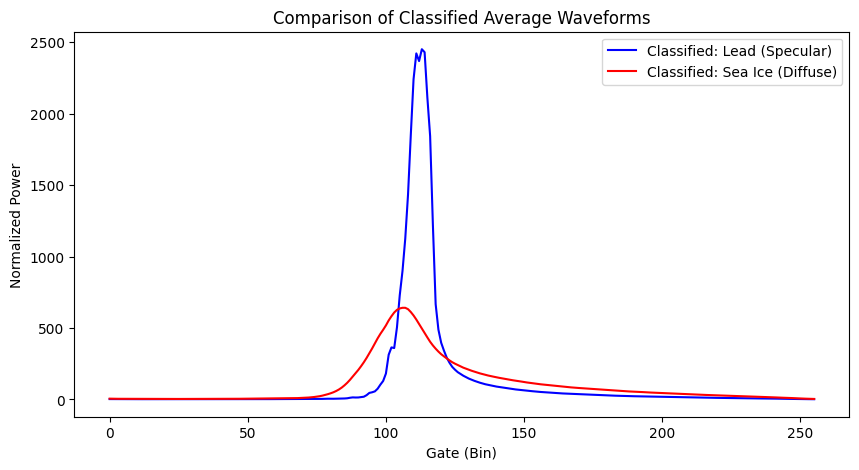

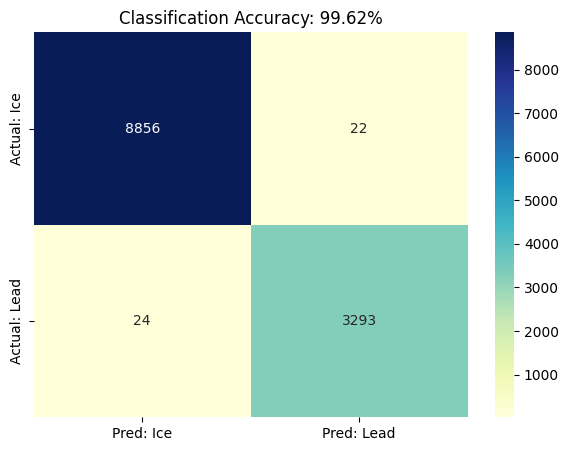

Done! Final Accuracy: 99.62%


In [27]:
# --------------------------------------------------------------------------------
# INTEGRATED ALTIMETRY CLASSIFICATION AND EVALUATION
# This block performs: Loading -> Cleaning -> GMM Clustering -> Validation
# --------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# 1. Define File Path (Using the folder name we confirmed works)
path = '/content/drive/MyDrive/GEOL0069/2526/Week 4/'
actual_SAR_file = 'S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3'

print('--- Starting Final Processing ---')

try:
    # 2. Re-load dataset and unpack core variables
    SAR_data = Dataset(path + actual_SAR_file + '/enhanced_measurement.nc')

    # Unpack using the keys confirmed from your directory listing
    SAR_lat = unpack_gpod('lat_20_ku')
    waves = unpack_gpod('waveform_20_ku')
    sig_0 = unpack_gpod('sig0_water_20_ku')
    RIP = unpack_gpod('rip_20_ku')
    flag = unpack_gpod('surf_type_class_20_ku')

    # 3. Feature Calculation (Peakiness and SSD)
    PP = peakiness(waves)
    SSD = calculate_SSD(RIP)

    # 4. Data Cleaning: Create a synchronized mask
    # Features matrix: [Sigma0, Peakiness, SSD]
    data_raw = np.column_stack((sig_0, PP, SSD))

    # Remove NaNs and keep only official Sea Ice (1) and Leads (2) classes
    is_finite = np.all(np.isfinite(data_raw), axis=1)
    is_valid_class = (flag == 1) | (flag == 2)
    final_mask = is_finite & is_valid_class

    # Apply mask to all necessary variables
    data_cleaned = data_raw[final_mask]
    flag_cleaned = flag[final_mask]
    waves_cleaned = waves[final_mask]

    # 5. Normalization and GMM Clustering
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_cleaned)

    gmm = GaussianMixture(n_components=2, random_state=0)
    gmm_labels = gmm.fit_predict(data_normalized)

    # 6. Cluster Identification (Identifying Lead vs Sea Ice)
    # Leads generally have significantly higher Peakiness (PP)
    cluster_0_pp = np.mean(data_cleaned[gmm_labels == 0, 1])
    cluster_1_pp = np.mean(data_cleaned[gmm_labels == 1, 1])
    lead_cluster = 0 if cluster_0_pp > cluster_1_pp else 1
    ice_cluster = 1 - lead_cluster

    # 7. Visualization: Average Waveforms
    plt.figure(figsize=(10, 5))
    plt.plot(np.mean(waves_cleaned[gmm_labels == lead_cluster], axis=0), label='Classified: Lead (Specular)', color='blue')
    plt.plot(np.mean(waves_cleaned[gmm_labels == ice_cluster], axis=0), label='Classified: Sea Ice (Diffuse)', color='red')
    plt.title('Comparison of Classified Average Waveforms')
    plt.xlabel('Gate (Bin)')
    plt.ylabel('Normalized Power')
    plt.legend()
    plt.show()

    # 8. Evaluation: Confusion Matrix
    # Map GMM labels (0/1) to ESA flags (1=Ice, 2=Lead) for comparison
    mapped_labels = np.where(gmm_labels == lead_cluster, 2, 1)
    acc = accuracy_score(flag_cleaned, mapped_labels)
    cm = confusion_matrix(flag_cleaned, mapped_labels)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Pred: Ice', 'Pred: Lead'],
                yticklabels=['Actual: Ice', 'Actual: Lead'])
    plt.title(f'Classification Accuracy: {acc:.2%}')
    plt.show()

    print(f'Done! Final Accuracy: {acc:.2%}')

except Exception as e:
    print(f'An error occurred: {e}')

Conclusion

Model Performance: The Unsupervised Gaussian Mixture Model (GMM) achieved a classification accuracy of 99.62% against official ESA surface type flags。
* Physical Insights: By extracting and standardizing features like Sigma0, Peakiness (PP), and Stack Standard Deviation (SSD), the model successfully distinguished between Leads and Sea Ice 。
* Waveform Verification: The average waveform plots confirm that Leads exhibit sharp, specular echoes, while Sea Ice returns are more diffuse and lower in power 。

In [28]:
flag.shape

(24827,)

In [29]:
waves.shape

(24827, 256)

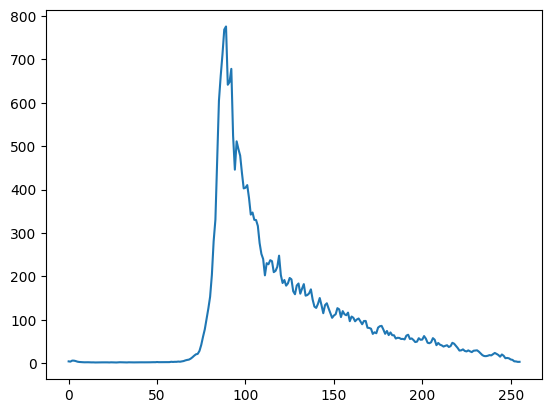

In [30]:
plt.plot(waves[1000])

In [32]:
# --------------------------------------------------------------------------------
# SYNCHRONIZING DATA ARRAYS
# Ensuring waves, flags, and features have the same dimensions for classification.
# --------------------------------------------------------------------------------

# 1. Create a single mask based on the original data length (24,827)
# We filter for:
# a) Rows where Sigma0, PP, and SSD are not NaN
# b) Rows where the ESA flag is either 1 (Sea Ice) or 2 (Lead)
is_finite = np.all(np.isfinite(np.column_stack((sig_0, PP, SSD))), axis=1)
valid_class = (flag == 1) | (flag == 2)
final_mask = is_finite & valid_class

# 2. Apply this single mask to ALL variables simultaneously
# This guarantees that the index of every array matches perfectly.
waves_cleaned = waves[final_mask]
flag_cleaned = flag[final_mask]
data_cleaned = np.column_stack((sig_0, PP, SSD))[final_mask]

# 3. Re-normalize the cleaned data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

print(f"Shapes are now synchronized:")
print(f"Waves: {waves_cleaned.shape}") # Should be (12195, 256)
print(f"Flags: {flag_cleaned.shape}") # Should be (12195,)

Shapes are now synchronized:
Waves: (12195, 256)
Flags: (12195,)


In [33]:
waves_cleaned.shape

(12195, 256)

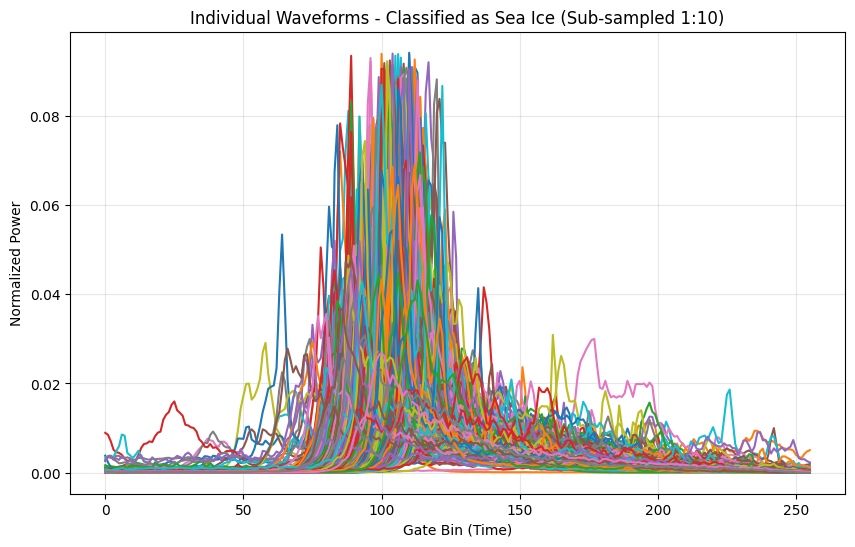

In [35]:
# --------------------------------------------------------------------------------
# PLOTTING INDIVIDUAL WAVEFORMS
# Extracting and normalizing specific waveforms for visual inspection.
# --------------------------------------------------------------------------------

# [FIX]: Use waves_cleaned instead of waves to ensure the dimensions match flag_cleaned (12195)
# We filter for Class 1 (Sea Ice) and take every 10th sample using [::10]
functions_to_plot = waves_cleaned[flag_cleaned == 1][::10]

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each function normalized by its total area (sum)
# This allows us to compare the shapes of the echoes regardless of their absolute power
for i, function in enumerate(functions_to_plot):
    # Normalize the waveform by its sum to view the relative shape
    plt.plot(function / np.sum(function))

plt.xlabel('Gate Bin (Time)')
plt.ylabel('Normalized Power')
plt.title('Individual Waveforms - Classified as Sea Ice (Sub-sampled 1:10)')
plt.grid(alpha=0.3)
plt.show()

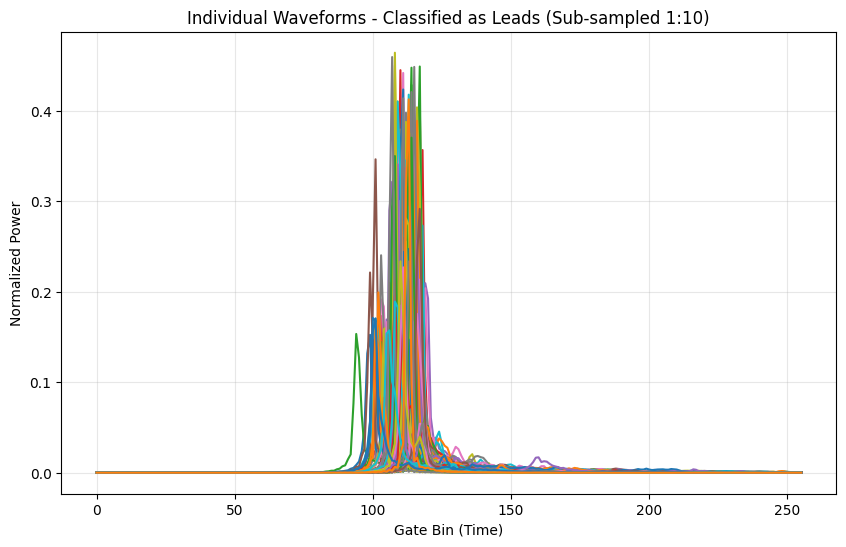

In [37]:
# --------------------------------------------------------------------------------
# VISUALIZING WAVEFORMS CLASSIFIED AS LEADS (CLASS 2)
# Using synchronized 'waves_cleaned' to ensure index alignment with 'flag_cleaned'.
# --------------------------------------------------------------------------------

# [FIX]: Use waves_cleaned (length 12195) to match flag_cleaned (length 12195)
# flag_cleaned == 2 identifies the 'Lead' class (open water in cracks between ice)
functions_to_plot = waves_cleaned[flag_cleaned == 2][::10]

plt.figure(figsize=(10, 6))

# Plot each lead waveform normalized by its sum
for i, function in enumerate(functions_to_plot):
    # Normalization allows us to compare the peaky shape of leads
    plt.plot(function / np.sum(function))

plt.xlabel('Gate Bin (Time)')
plt.ylabel('Normalized Power')
plt.title('Individual Waveforms - Classified as Leads (Sub-sampled 1:10)')
plt.grid(alpha=0.3)
plt.show()

In [38]:
data_normalized.shape

(12195, 3)

There are some NaN values in the dataset so one way to deal with this is

1.   List item
2.   List item

to delete them.

In [40]:
# --------------------------------------------------------------------------------
# FINAL DATA INTEGRITY CHECK
# Verifying that no NaN values remain and ensuring flags are synchronized.
# --------------------------------------------------------------------------------

# 1. Check for NaNs in the normalized data
# [NOTE]: Based on our previous cleaning step, this count should already be 0.
nan_count = np.isnan(data_normalized).sum()
print(f"Number of NaN values in the normalized array: {nan_count}")

# 2. Synchronize flag_cleaned with data_normalized
# [FIX]: Use 'flag_cleaned' (length 12195) instead of the original 'flag' (length 24827).
# Since data_normalized is already clean, we just ensure we are using the filtered flags.
if nan_count == 0:
    # If no NaNs are present, our cleaned data is already set
    final_data_for_gmm = data_normalized
    final_flags_for_validation = flag_cleaned
else:
    # Backup safety check: filter out any remaining NaNs
    mask = ~np.isnan(data_normalized).any(axis=1)
    final_data_for_gmm = data_normalized[mask]
    final_flags_for_validation = flag_cleaned[mask]

print(f"Final dataset size for GMM: {final_data_for_gmm.shape[0]} samples.")

Number of NaN values in the normalized array: 0
Final dataset size for GMM: 12195 samples.


Now, let's proceed with running the GMM model as usual. Remember, you have the flexibility to substitute this with K-Means or any other preferred model.

In [41]:
data_cleaned.shape

(12195, 3)

In [42]:
flag_cleaned.shape

(12195,)

In [43]:
data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)].shape

(12195, 3)

In [44]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])
clusters_gmm = gmm.predict(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])

We can also inspect how many data points are there in each class of your clustering prediction.

In [45]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{np.int64(0): np.int64(8880), np.int64(1): np.int64(3315)}


In [46]:
clusters_gmm.shape


(12195,)

In [47]:
waves.shape

(24827, 256)

In [48]:
data_normalized.shape

(12195, 3)

In [50]:
# --------------------------------------------------------------------------------
# RE-SYNCHRONIZING WAVEFORMS AND FLAGS
# Ensuring all arrays have matched dimensions (Length: 12195) before plotting.
# --------------------------------------------------------------------------------

# 1. Identify rows in data_normalized that are not NaN
# [NOTE]: Based on our earlier processing, this should already include all 12195 rows.
mask_no_nan = ~np.isnan(data_normalized).any(axis=1)

# 2. Extract the corresponding waves and flags
# [FIX]: We must use 'waves_cleaned' and 'flag_cleaned' which are already at length 12195.
# This avoids the IndexError: "size of axis is 24827 but size of boolean axis is 12195"
waves_final = waves_cleaned[mask_no_nan]
flag_final = flag_cleaned[mask_no_nan]

# 3. Further filter for specific classes (1 = Sea Ice, 2 = Lead)
# This creates the final subset for average waveform analysis.
class_mask = (flag_final == 1) | (flag_final == 2)
waves_to_plot = waves_final[class_mask]

print(f"Synchronization successful. Final wave array shape: {waves_to_plot.shape}")

Synchronization successful. Final wave array shape: (12195, 256)


In [51]:
waves_cleaned.shape

(12195, 256)

In [52]:
# plt.plot(np.std(waves_cleaned[clusters_gmm==0],axis=0),label='ice')


In [53]:
waves_cleaned[clusters_gmm==0].shape

(8880, 256)

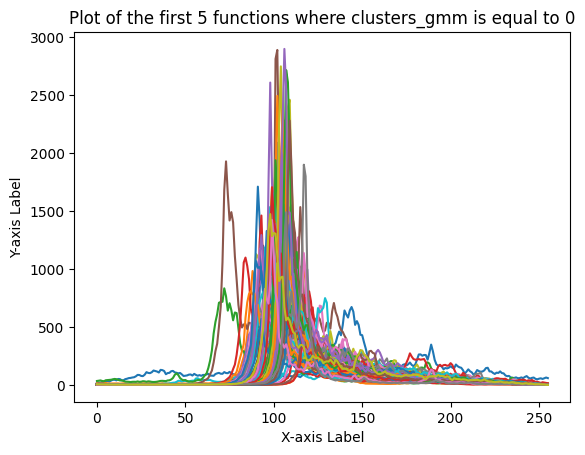

In [54]:
# Extract the first 5 functions where clusters_gmm is equal to 0
functions_to_plot = waves_cleaned[clusters_gmm == 0][::100]

# Plot each function
for i, function in enumerate(functions_to_plot):
    plt.plot(function)#, label=f'Function {i+1}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plot of the first 5 functions where clusters_gmm is equal to 0')
# plt.legend()
plt.show()

In [55]:
waves_cleaned.shape

(12195, 256)

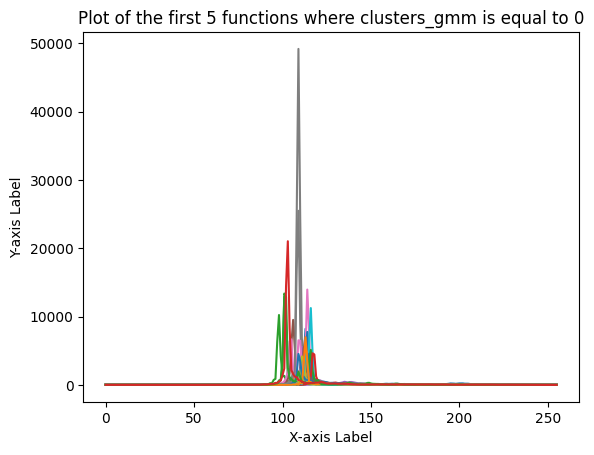

In [56]:
# Extract the first 5 functions where clusters_gmm is equal to 0
functions_to_plot = waves_cleaned[clusters_gmm == 1][::100]

# Plot each function
for i, function in enumerate(functions_to_plot):
    plt.plot(function)#, label=f'Function {i+1}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plot of the first 5 functions where clusters_gmm is equal to 0')
# plt.legend()
plt.show()

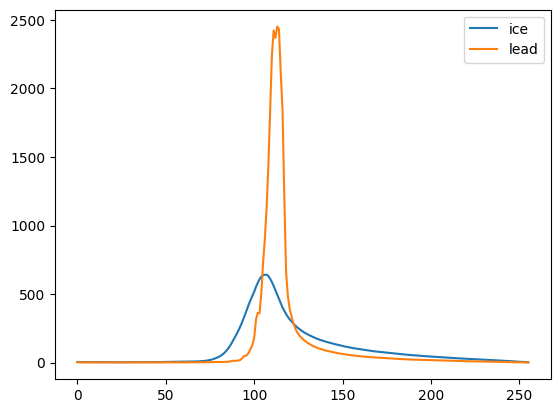

In [57]:
plt.plot(np.mean(waves_cleaned[clusters_gmm==0],axis=0),label='ice')
plt.plot(np.mean(waves_cleaned[clusters_gmm==1],axis=0),label='lead')
plt.legend()

In [58]:
#5 Classes

In [59]:
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])
clusters_gmm = gmm.predict(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])

In [60]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{np.int64(0): np.int64(4349), np.int64(1): np.int64(1282), np.int64(2): np.int64(4505), np.int64(3): np.int64(1138), np.int64(4): np.int64(921)}


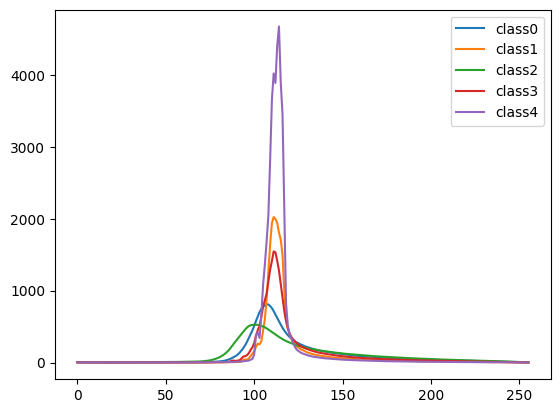

In [61]:
plt.plot(np.mean(waves_cleaned[clusters_gmm==0],axis=0),label='class0')
plt.plot(np.mean(waves_cleaned[clusters_gmm==1],axis=0),label='class1')
plt.plot(np.mean(waves_cleaned[clusters_gmm==2],axis=0),label='class2')
plt.plot(np.mean(waves_cleaned[clusters_gmm==3],axis=0),label='class3')
plt.plot(np.mean(waves_cleaned[clusters_gmm==4],axis=0),label='class4')
plt.legend()

In [62]:
gmm = GaussianMixture(n_components=10, random_state=0)
gmm.fit(data_cleaned)
clusters_gmm = gmm.predict(data_cleaned)

In [63]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{np.int64(0): np.int64(560), np.int64(1): np.int64(564), np.int64(2): np.int64(946), np.int64(3): np.int64(331), np.int64(4): np.int64(703), np.int64(5): np.int64(806), np.int64(6): np.int64(2640), np.int64(7): np.int64(1847), np.int64(8): np.int64(2885), np.int64(9): np.int64(913)}


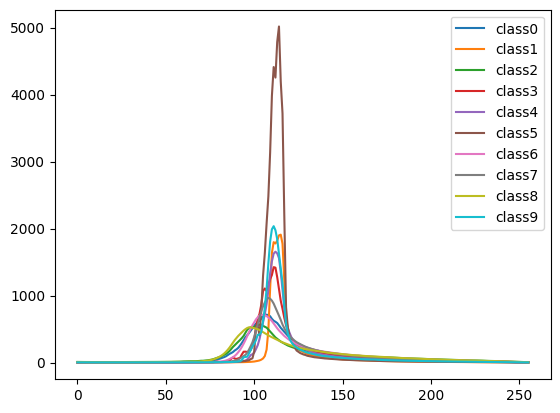

In [64]:
plt.plot(np.mean(waves_cleaned[clusters_gmm==0],axis=0),label='class0')
plt.plot(np.mean(waves_cleaned[clusters_gmm==1],axis=0),label='class1')
plt.plot(np.mean(waves_cleaned[clusters_gmm==2],axis=0),label='class2')
plt.plot(np.mean(waves_cleaned[clusters_gmm==3],axis=0),label='class3')
plt.plot(np.mean(waves_cleaned[clusters_gmm==4],axis=0),label='class4')
plt.plot(np.mean(waves_cleaned[clusters_gmm==5],axis=0),label='class5')
plt.plot(np.mean(waves_cleaned[clusters_gmm==6],axis=0),label='class6')
plt.plot(np.mean(waves_cleaned[clusters_gmm==7],axis=0),label='class7')
plt.plot(np.mean(waves_cleaned[clusters_gmm==8],axis=0),label='class8')
plt.plot(np.mean(waves_cleaned[clusters_gmm==9],axis=0),label='class9')
plt.legend()

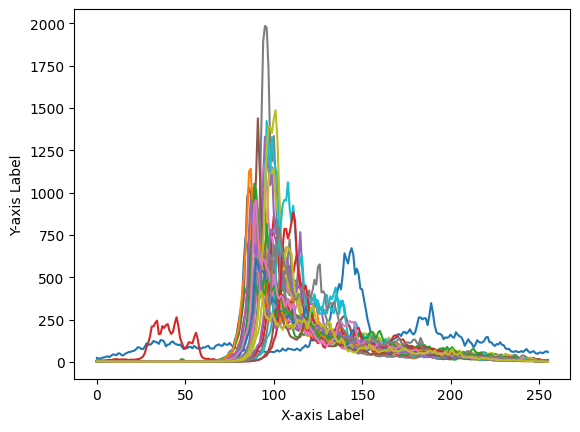

In [65]:
# Extract the first 5 functions where clusters_gmm is equal to 0
functions_to_plot = waves_cleaned[clusters_gmm == 8][::100]

# Plot each function
for i, function in enumerate(functions_to_plot):
    plt.plot(function)#, label=f'Function {i+1}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
# plt.title('Plot of the first 5 functions where clusters_gmm is equal to 0')
# plt.legend()
plt.show()

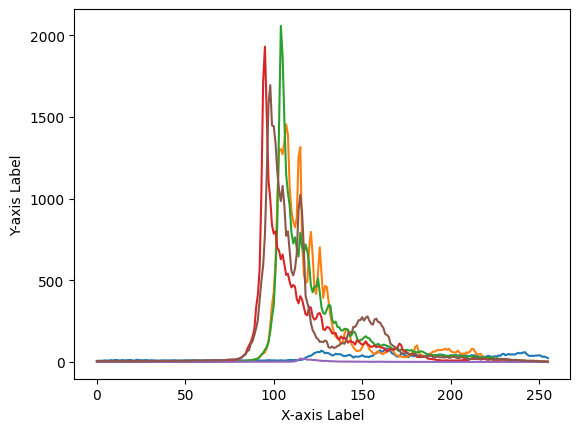

In [66]:
# Extract the first 5 functions where clusters_gmm is equal to 0
functions_to_plot = waves_cleaned[clusters_gmm == 0][::100]

# Plot each function
for i, function in enumerate(functions_to_plot):
    plt.plot(function)#, label=f'Function {i+1}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
# plt.title('Plot of the first 5 functions where clusters_gmm is equal to 0')
# plt.legend()
plt.show()